In [1]:
import os
from dotenv import load_dotenv
from datetime import datetime
import logging

from pathlib import Path
import sys
sys.path.append('..')  # Add parent directory to path

from IPython.display import Image, display, Markdown

from config import Settings, get_llm_config, load_project_config, initialize_llm, get_settings

from workflow import ADRWorkflow #create_workflow, run_workflow
from nodes.context_generator_node import context_generator_node
from nodes.terraform_analyzer_node import terraform_analyzer_minor_node, terraform_analyzer_major_node
from nodes.source_code_analyzer_node import source_code_analyzer_minor_node, source_code_analyzer_major_node
from nodes.architecture_diff_node import architecture_diff_node
from nodes.adr_generator_node import adr_generator_node


In [2]:
# Load environment variables from .env file
print(load_dotenv())

# Verify environment variables are loaded
print("Environment variables loaded:")
print(f"OPENAI_API_KEY: {'***' + os.getenv('OPENAI_API_KEY', '')[-4:] if os.getenv('OPENAI_API_KEY') else 'NOT SET'}")
print(f"OPENAI_MODEL: {os.getenv('OPENAI_MODEL', 'gpt-4.1-mini (default)')}")

True
Environment variables loaded:
OPENAI_API_KEY: ***GH0A
OPENAI_MODEL: gpt-4.1-mini (default)


In [3]:
logging.basicConfig(
    stream=sys.stdout, 
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    force=True # Ensures reconfiguration works in notebooks
)

In [4]:
# Load environment-based settings (from .env)
settings = Settings()
print("Settings loaded from .env:")
print(f"  Model: {settings.openai_model}")
print(f"  Temperature: {settings.temperature}")
print(f"  Max Tokens: {settings.max_tokens}")

Settings loaded from .env:
  Model: gpt-4.1-mini
  Temperature: 0.1
  Max Tokens: None


---

In [5]:
# Load project configuration from YAML
project_dir = "../project-inputs/abelaa"
# project_dir = "../project-inputs/chef"
# project_dir = "../project-inputs/serverlessmike"


2026-02-15 14:52:34 - INFO - 
LLM initialized:
2026-02-15 14:52:34 - INFO -   Model: gpt-4.1-mini
2026-02-15 14:52:34 - INFO -   Temperature: 0.1
2026-02-15 14:52:34 - INFO - 
Project configuration loaded:
2026-02-15 14:52:34 - INFO -   Project Name: abelaa
2026-02-15 14:52:34 - INFO -   Terraform Minor: abelaa_cloud_evolucion_menor.tf
2026-02-15 14:52:34 - INFO -   Terraform Major: abelaa_cloud_evolucion_mayor.tf
2026-02-15 14:52:34 - INFO -   Source Code ZIP: abelaa_app.zip
2026-02-15 14:52:34 - INFO -   Knowledge Base: knowledge/IAC.txt
2026-02-15 14:52:34 - INFO -   LLM Model: gpt-4.1-mini
2026-02-15 14:52:34 - INFO - Initial state: {'project_name': 'abelaa', 'terraform_minor': '../project-inputs/abelaa/abelaa_cloud_evolucion_menor.tf', 'terraform_major': '../project-inputs/abelaa/abelaa_cloud_evolucion_mayor.tf', 'source_code_zip': '../project-inputs/abelaa/abelaa_app.zip', 'knowledge_base': 'knowledge/IAC.txt', 'timestamp': '2026-02-15T14:52:34.173190'}
2026-02-15 14:52:34 - INFO

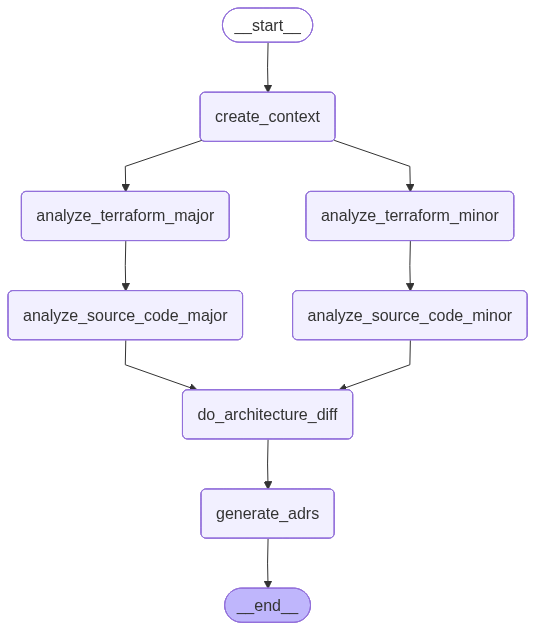

In [6]:
# Create the workflow graph
workflow = ADRWorkflow(project_dir)

initial_state = workflow.create(include_terraform=True, include_knowledge=True)

print("\nWorkflow created successfully!")
display(workflow.get_graph())

In [7]:
print("\nInitial state prepared:")
for key, value in initial_state.items():
    print(f"  {key}: {value}")



Initial state prepared:
  project_name: abelaa
  terraform_minor: ../project-inputs/abelaa/abelaa_cloud_evolucion_menor.tf
  terraform_major: ../project-inputs/abelaa/abelaa_cloud_evolucion_mayor.tf
  source_code_zip: ../project-inputs/abelaa/abelaa_app.zip
  knowledge_base: knowledge/IAC.txt
  timestamp: 2026-02-15T14:52:34.173190


---

In [8]:
result = await workflow.run(initial_state)
result

2026-02-15 14:52:34 - INFO - RUNNING workflow for project: ../project-inputs/abelaa - 48f14805-ae4e-4b05-9f00-4c60ea004195
2026-02-15 14:52:34 - INFO - STEP: context_generator_node
2026-02-15 14:52:34 - INFO - STEP: terraform_analyzer_major_node
2026-02-15 14:52:34 - INFO - STEP: terraform_analyzer_minor_node
2026-02-15 14:52:38 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-02-15 14:52:39 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-02-15 14:52:39 - INFO - STEP: source_code_analyzer_major_node
2026-02-15 14:52:39 - INFO - STEP: source_code_analyzer_minor_node
2026-02-15 14:53:01 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-02-15 14:53:04 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-02-15 14:53:04 - INFO - STEP: architecture_diff_node
2026-02-15 14:53:15 - INFO - HTTP Request: POST https://api.o

{'terraform_minor': '../project-inputs/abelaa/abelaa_cloud_evolucion_menor.tf',
 'terraform_major': '../project-inputs/abelaa/abelaa_cloud_evolucion_mayor.tf',
 'source_code_zip': '../project-inputs/abelaa/abelaa_app.zip',
 'knowledge_base': '../knowledge/IAC.txt',
 'architectural_context': '\n# Theoretical Introduction to Software Architecture, Monolithic Architecture, and Microservices Architecture\n\n## 1. Software Architecture\n\n### Definition\nSoftware architecture refers to the fundamental structures of a software system and the discipline of creating such structures and systems. It involves the high-level structuring of software components, their relationships, and the principles and guidelines governing their design and evolution over time.\n\n### Purpose and Importance\n- **Blueprint for Development:** Acts as a blueprint guiding the design and implementation of the system.\n- **Communication Tool:** Facilitates communication among stakeholders including developers, architect

In [9]:
llm = get_llm_config().llm

---

In [10]:
# Test context generator node
print("\n--- Testing Context Generator Node ---")

context_result = await context_generator_node(initial_state, llm=llm)

print(f"Architectural context generated: {len(context_result['architectural_context'])} characters")
print(f"Project structure extracted: {len(context_result['project_structure'])} characters")
print()

# display(Markdown(context_result['architectural_context']))
# display(Markdown(context_result['project_structure']))
print(context_result['project_structure'])

context_result


--- Testing Context Generator Node ---
2026-02-15 14:53:48 - INFO - STEP: context_generator_node
Architectural context generated: 7145 characters
Project structure extracted: 860 characters

PROJECT STRUCTURE ANALYSIS

Total Directories: 1
Python Files: 0
TypeScript Files: 0
TSX Files: 0
JavaScript Files: 0
PHP Files: 2
Java Files: 0
XML Files: 0
Terraform Files: 0
Configuration Files: 0
Other Files: 8


PROJECT FILE TREE:
AppKernel.php
config
    ├── config.yml
    ├── config_dev.yml
    ├── config_test.yml
    ├── migrations.yml
    ├── parameters.php
    ├── parameters_test.yml
    ├── pcmt_migrations.yml
    ├── routing.yml
    └── security_test.yml


FILE TYPE BREAKDOWN:

  PHP Source Files:
    - config/parameters.php
    - AppKernel.php

  Other Files:
    - config/config.yml
    - config/config_dev.yml
    - config/config_test.yml
    - config/migrations.yml
    - config/parameters_test.yml
    - config/pcmt_migrations.yml
    - config/routing.yml
    - config/security_test.ym

{'project_name': 'abelaa',
 'terraform_minor': '../project-inputs/abelaa/abelaa_cloud_evolucion_menor.tf',
 'terraform_major': '../project-inputs/abelaa/abelaa_cloud_evolucion_mayor.tf',
 'source_code_zip': '../project-inputs/abelaa/abelaa_app.zip',
 'knowledge_base': '../knowledge/IAC.txt',
 'timestamp': '2026-02-15T14:52:34.173190',
 'architectural_context': '\n# Theoretical Introduction to Software Architecture, Monolithic Architecture, and Microservices Architecture\n\n## 1. Software Architecture\n\n### Definition\nSoftware architecture refers to the fundamental structures of a software system and the discipline of creating such structures and systems. It involves the high-level structuring of software components, their relationships, and the principles and guidelines governing their design and evolution over time.\n\n### Purpose and Importance\n- **Blueprint for Development:** Acts as a blueprint guiding the design and implementation of the system.\n- **Communication Tool:** Facil

In [11]:
# for k, v in context_result['source_code_dict'].items():
#     print("="*10+" "+k)
#     print(v)
#     print("="*20)

In [12]:
# display(Markdown(context_result['architectural_context'].strip()))
# print(context_result['architectural_context'].strip())


---

In [13]:
# path_knowledge_base = context_result['knowledge_base']
# context_result['knowledge_base'] = "../" +  path_knowledge_base if not path_knowledge_base.startswith("../") else path_knowledge_base


In [14]:
print("\n--- Testing Terraform Analyzer Minor Node ---")

terraform_result1 = await terraform_analyzer_minor_node(context_result, llm=llm)

# display(Markdown(context_result['terraform_analysis_minor']))
terraform_result1['terraform_analysis_minor']


--- Testing Terraform Analyzer Minor Node ---
2026-02-15 14:53:48 - INFO - STEP: terraform_analyzer_minor_node
2026-02-15 14:53:50 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'microservices': False,
 'confidence': 0.85,
 'signals_for': ['Use of Terraform modules for infrastructure abstraction [C# module "covid-dev"]',
  'Separate Terraform remote states for network and hosted zone indicating some modularity [C# data terraform_remote_state]'],
 'signals_against': ['Single module \'covid-dev\' appears to deploy a unified infrastructure without multiple service-specific modules [C# module "covid-dev"]',
  'No evidence of multiple independently deployable services such as ECS services, Lambda functions, or Kubernetes deployments [R#1]',
  'No asynchronous communication resources like SQS, SNS, EventBridge, or Kafka topics detected [R#4]',
  'No per-service autoscaling or dedicated security groups indicating independent service deployment [R#3]',
  'Single subnet and security group references suggest a shared network environment without service isolation [C# data terraform_remote_state.pcmt-network]']}

In [15]:
print("\n--- Testing Terraform Analyzer Major Node ---")

terraform_result2 = await terraform_analyzer_major_node(context_result, llm=llm)

# display(Markdown(context_result['terraform_analysis_major']))
terraform_result2['terraform_analysis_major']


--- Testing Terraform Analyzer Major Node ---
2026-02-15 14:53:50 - INFO - STEP: terraform_analyzer_major_node
2026-02-15 14:53:54 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'microservices': False,
 'confidence': 0.9,
 'signals_for': ['Use of multiple Terraform modules for network and compute infrastructure [R2], [C modules/pcmt-network and modules/pcmt]',
  'Deployment of multiple environments (demo, beta, covid-dev, etc.) each with own Terraform state and configuration [C various environment folders]'],
 'signals_against': ['No evidence of multiple independently deployable services such as ECS services, Lambda functions, or Kubernetes deployments [R1], [C all Terraform code]',
  'Single EC2 instance deployment per environment indicating a monolithic application deployment [C modules/pcmt compute.tf aws_instance.app]',
  'No asynchronous communication resources like SQS, SNS, EventBridge, Kafka, or PubSub detected [R4], [C all Terraform code]',
  'Shared security groups and subnet usage across the application indicating tight coupling [C modules/pcmt compute.tf and network.tf]',
  'No per-service autoscaling or independent pipelines evident [R3], [C all 

---

In [16]:
print("\n--- Testing Source Code Analyzer Minor Node ---")

source_code_result1 = await source_code_analyzer_minor_node(context_result, llm=llm)

source_code_result1['improved_analysis_minor']


--- Testing Source Code Analyzer Minor Node ---
2026-02-15 14:53:54 - INFO - STEP: source_code_analyzer_minor_node
2026-02-15 14:54:19 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'# Architecture Analysis of the Given Hybrid Solution\n\n---\n\n## 1. Project Structure and Codebase Organization\n\n### Overview\n\n- The project contains **one main directory** with PHP source files and configuration files.\n- No Python or Terraform files are present in the source code snapshot, despite the initial context mentioning Python and Terraform.\n- The PHP codebase is organized primarily around a **Symfony-based monolithic application** with multiple bundles (modules) registered in a single kernel (`AppKernel.php`).\n- Configuration files are centralized under the `config/` directory, following Symfony conventions.\n\n### Monolithic vs Modular\n\n- The application is a **modular monolith**:\n  - It is a single deployable unit (one PHP application).\n  - The modularity is achieved through Symfony bundles, which encapsulate features and domain logic.\n  - Bundles such as `PcmtSharedBundle`, `PcmtCoreBundle`, `PcmtDraftBundle`, and others represent logical modules.\n  - Third-

In [17]:
# display(Markdown(context_result['improved_analysis_minor']))
# print(context_result['improved_analysis_minor']) #.strip('"')

In [18]:
print("\n--- Testing Source Code Analyzer Major Node ---")

source_code_result2 = await source_code_analyzer_major_node(context_result, llm=llm)

source_code_result2['improved_analysis_major']


--- Testing Source Code Analyzer Major Node ---
2026-02-15 14:54:19 - INFO - STEP: source_code_analyzer_major_node


2026-02-15 14:54:40 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


"# Architecture Analysis of the Given Solution\n\n---\n\n## 1. Project Structure and Codebase Organization\n\n### Overview\n\n- The project contains **PHP source files only**, no Python or Terraform files were found in the provided source code.\n- The root directory contains a single PHP file `AppKernel.php` and a `config` directory with multiple YAML and PHP configuration files.\n- The `AppKernel.php` is a Symfony Kernel class, responsible for bootstrapping the application and registering bundles (modules/plugins).\n- The `config` directory contains environment-specific configuration files (`config_dev.yml`, `config_test.yml`, etc.), routing, security, and migration configurations.\n\n### Monolithic vs Modular\n\n- The codebase is **organized as a monolithic Symfony PHP application**.\n- The modularity is achieved through **Symfony Bundles**, which are self-contained units of code (similar to modules or plugins).\n- The `AppKernel.php` registers multiple bundles, including:\n  - Custo

In [19]:
# display(Markdown(context_result['improved_analysis_major']))
# print(context_result['improved_analysis_major']) #.strip('"')

---

In [20]:
print("\n--- Testing Diff Analysis Node ---")

diff_result = await architecture_diff_node(context_result, llm=llm)

diff_result['architecture_diff']


--- Testing Diff Analysis Node ---
2026-02-15 14:54:40 - INFO - STEP: architecture_diff_node
2026-02-15 14:54:51 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'# Key Architecture Decisions in Migrating from Hybrid (Modular Monolith + Minimal Serverless) to Microservices Architecture\n\n---\n\n## 1. Decomposition Strategy: From Modular Bundles to Independently Deployable Services\n\n**Description:**  \nThe migration required decomposing the monolithic Symfony application—organized as modular bundles running within a single runtime—into multiple independent microservices, each encapsulated as a separate Lambda function.\n\n**Key Differences Necessitating This Decision:**  \n- Hybrid version: Single Symfony Kernel bootstrapping all bundles in one process; modularity limited to code organization without runtime isolation.  \n- Microservices version: Multiple Lambda functions representing distinct services, deployed and scaled independently.  \n- Need to break down tightly coupled bundles into loosely coupled, independently deployable units.\n\n**Architectural Impact:**  \n- Enables independent development, deployment, and scaling of services.  \

In [21]:
# display(Markdown(context_result['architecture_diff']))
# print(context_result['architecture_diff']) #.strip('"')

---

In [22]:
print("\n--- Testing ADR Generation Node ---")

adr_result = await adr_generator_node(context_result, llm=llm)

adr_result['adr_files']


--- Testing ADR Generation Node ---
2026-02-15 14:54:51 - INFO - STEP: adr_generator_node
2026-02-15 14:55:20 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'abelaa_ADR_1.md': '# ADR: Decomposition Strategy\n\n## Title\nDecompose Modular Monolith into Independently Deployable Microservices\n\n## Status\nAccepted\n\n## Motivation\nThe existing hybrid architecture organizes the application as modular bundles within a single Symfony Kernel process, limiting runtime isolation and independent scalability. To achieve greater agility, scalability, and fault isolation, it is necessary to decompose the monolithic application into multiple independently deployable services. This decomposition enables clear service boundaries, ownership, and responsibility, which are essential for evolving the system towards a microservices architecture.\n\n## Decision Drivers\n- Need for independent development and deployment cycles\n- Requirement for scalability of individual components\n- Desire for clear service ownership and responsibility\n- Limitations of tightly coupled bundles within a single runtime\n- Operational complexity introduced by distributed servi

In [23]:
# context_result = result

# folder_path = Path("../output-adrs/"+project_config['project_name'])
# folder_path.mkdir(parents=True, exist_ok=True) 

for k,adr in context_result['adr_files'].items():
    print("="*10+" "+k)
    display(Markdown(adr))
    print(("="*30))
    print()
    # with (folder_path / k).open("w") as file:
    #     file.write(adr)

    # print(f"File '{k}' written to '{folder_path}'")

========== abelaa_ADR_1.md


# ADR: Decomposition Strategy

## Title
Decompose Modular Monolith into Independently Deployable Microservices

## Status
Accepted

## Motivation
The existing hybrid architecture organizes the application as modular bundles within a single Symfony Kernel process, limiting runtime isolation and independent scalability. To achieve greater agility, scalability, and fault isolation, it is necessary to decompose the monolithic application into multiple independently deployable services. This decomposition enables clear service boundaries, ownership, and responsibility, which are essential for evolving the system towards a microservices architecture.

## Decision Drivers
- Need for independent development and deployment cycles
- Requirement for scalability of individual components
- Desire for clear service ownership and responsibility
- Limitations of tightly coupled bundles within a single runtime
- Operational complexity introduced by distributed services

## Main Decision
We decided to decompose the monolithic Symfony application, previously organized as modular bundles running within a single runtime, into multiple independent microservices. Each microservice is encapsulated as a separate AWS Lambda function, enabling independent deployment, scaling, and ownership. This approach requires redefining domain boundaries and interfaces to support service autonomy and loose coupling, facilitating a transition from a modular monolith to a microservices architecture.

## Alternatives
- Modular Monolith with Runtime Isolation: Enhance modular bundles to run in isolated runtimes but still within a single deployment unit
- Service-Oriented Architecture (SOA): Decompose into services but deploy on shared infrastructure without full independence

## Pros
Main decision:
- Enables independent development, deployment, and scaling of services
- Improves fault isolation and resilience
- Clarifies service boundaries and ownership
- Facilitates adoption of microservices best practices

Modular Monolith with Runtime Isolation:
- Retains simpler deployment model
- Reduces operational complexity compared to full microservices

Service-Oriented Architecture (SOA):
- Allows service decomposition with some independence
- May leverage existing infrastructure and tooling

## Cons
Main decision:
- Increases operational complexity due to distributed nature
- Requires significant redesign of domain boundaries and interfaces
- Demands new skills and tooling for microservices management

Modular Monolith with Runtime Isolation:
- Limited scalability and deployment independence
- Does not fully address fault isolation

Service-Oriented Architecture (SOA):
- Potential for tight coupling and shared infrastructure
- Less agility compared to microservices

## Consequences
Short-term, the decomposition increases complexity in development and operations due to distributed services and the need for new deployment pipelines. Long-term, it improves scalability, maintainability, and resilience by enabling independent service evolution and fault isolation. The architecture gains flexibility but requires investment in monitoring, logging, and service orchestration. Overall, this decision aligns with strategic goals for agility and scalability at the cost of increased operational overhead.

## Validation
Validation to be defined in future iterations.

## Additional Information



========== abelaa_ADR_2.md


# ADR: Communication Style

## Title
Adopt Networked API Gateway Communication Between Services

## Status
Accepted

## Motivation
The hybrid architecture relies on synchronous, in-process method calls within a single runtime, which is not feasible when services are deployed independently as microservices. To enable communication between independently deployable Lambda functions, a networked communication style mediated by an API Gateway is required. This approach supports service discovery, routing, and external access control, which are essential for a distributed microservices environment.

## Decision Drivers
- Transition from single process to distributed services
- Need for service discovery and routing
- Requirement for external access control and security
- Handling network latency and failure modes
- API design and versioning needs

## Main Decision
We chose to implement communication between microservices via HTTP APIs exposed through an API Gateway. This gateway routes requests to the appropriate Lambda functions, enabling networked interactions between services. This design introduces network boundaries, requiring robust error handling, retries, and security mechanisms such as authentication and authorization at the gateway level. It also necessitates careful API design and contract management to maintain service interoperability.

## Alternatives
- In-Process Calls: Retain synchronous calls within a single runtime (not feasible post-decomposition)
- Message-Based Asynchronous Communication: Use messaging queues or event buses for inter-service communication

## Pros
Main decision:
- Enables clear service boundaries and decoupling
- Supports independent scaling and deployment
- Provides centralized access control and routing
- Facilitates API versioning and contract management

In-Process Calls:
- Low latency and high performance
- Simple error handling

Message-Based Asynchronous Communication:
- Improves resilience and decoupling
- Enables eventual consistency and scalability

## Cons
Main decision:
- Introduces network latency and potential failure points
- Requires complex error handling and retries
- Adds operational overhead for API management

In-Process Calls:
- Not feasible with independent services
- Limits scalability and fault isolation

Message-Based Asynchronous Communication:
- Increased complexity in design and debugging
- Potentially higher latency and eventual consistency challenges

## Consequences
This decision introduces network latency and new failure modes, requiring robust error handling and monitoring. It improves scalability and security by centralizing access control at the API Gateway. The architecture must accommodate API versioning and contract management to ensure backward compatibility. Overall, it shifts complexity from in-process calls to network communication management, aligning with microservices principles.

## Validation
Validation to be defined in future iterations.

## Additional Information



========== abelaa_ADR_3.md


# ADR: Deployment Model

## Title
Deploy Independent Serverless Functions Managed via Infrastructure as Code

## Status
Accepted

## Motivation
The existing hybrid architecture deploys a single PHP monolithic application as one artifact sharing runtime and infrastructure. To realize the benefits of microservices, including independent deployment and scaling, the deployment model must evolve to support multiple serverless Lambda functions. Managing these functions independently via infrastructure as code enables rapid deployment cycles, reduces failure blast radius, and aligns with cloud-native operational practices.

## Decision Drivers
- Need for independent deployment and scaling
- Desire to reduce blast radius of failures
- Adoption of serverless operational practices
- Requirement for infrastructure automation and repeatability

## Main Decision
We decided to deploy each microservice as an independent AWS Lambda function, managed and provisioned through infrastructure as code tools. This approach enables rapid, isolated deployments and scaling per function, reducing the impact of failures. It also necessitates adopting serverless operational considerations such as cold start management, monitoring, and logging. Infrastructure as code ensures consistent, repeatable deployments and facilitates automation.

## Alternatives
- Single Unified Deployment: Continue deploying a single monolithic artifact
- Containerized Microservices: Deploy services as containers managed by orchestration platforms

## Pros
Main decision:
- Enables rapid, independent deployment cycles
- Reduces blast radius of failures
- Aligns with cloud-native, event-driven paradigms
- Facilitates infrastructure automation

Single Unified Deployment:
- Simpler deployment process
- Lower operational overhead

Containerized Microservices:
- Greater control over runtime environment
- Supports complex service dependencies

## Cons
Main decision:
- Requires managing cold starts and serverless limitations
- Demands new monitoring and logging strategies
- Potential vendor lock-in with serverless platform

Single Unified Deployment:
- Limits scalability and agility
- Increases risk of widespread failures

Containerized Microservices:
- Higher operational complexity than serverless
- Requires container orchestration expertise

## Consequences
Short-term, this decision requires investment in new deployment pipelines and operational tooling. Long-term, it improves deployment agility, fault isolation, and scalability. The architecture embraces cloud-native paradigms but must address serverless-specific challenges such as cold starts and observability. This decision supports continuous delivery and aligns with modern DevOps practices.

## Validation
Validation to be defined in future iterations.

## Additional Information



========== abelaa_ADR_4.md


# ADR: Data Management

## Title
Adopt Service-Specific Data Handling with Decentralized Data Ownership

## Status
Accepted

## Motivation
The hybrid architecture uses a single shared relational database schema accessed by all bundles, leading to tight coupling and limited scalability. Migrating to microservices requires decentralizing data management so that each service owns and manages its own data. This enforces bounded contexts, improves fault isolation, and supports independent scaling, but introduces challenges in maintaining data consistency and transactions across services.

## Decision Drivers
- Need to enforce bounded contexts and data ownership
- Requirement for fault isolation and scalability
- Challenges of distributed transactions and consistency
- Necessity for data synchronization or eventual consistency patterns

## Main Decision
We decided that each microservice will manage its own data store or access data through service APIs, avoiding a shared database schema. This decentralization aligns with bounded context principles and enables services to evolve independently. To handle cross-service data consistency, eventual consistency patterns and asynchronous messaging may be adopted. This approach improves scalability and fault isolation but requires careful design of data replication and synchronization strategies.

## Alternatives
- Shared Database Schema: Continue using a single relational database shared by all services
- Database per Service with Synchronous Access: Services access other services' databases synchronously

## Pros
Main decision:
- Improves fault isolation and scalability
- Enforces clear data ownership and bounded contexts
- Enables independent evolution of data models

Shared Database Schema:
- Simplifies data consistency and transactions
- Easier to query across domains

Database per Service with Synchronous Access:
- Allows direct data access without API overhead
- Maintains some data autonomy

## Cons
Main decision:
- Introduces complexity in maintaining data consistency
- Requires adoption of eventual consistency and messaging
- Increases design complexity for data synchronization

Shared Database Schema:
- Leads to tight coupling and reduced service autonomy
- Limits scalability and fault isolation

Database per Service with Synchronous Access:
- Creates tight coupling through direct database access
- Risks data integrity and service independence

## Consequences
This decision increases architectural complexity by requiring asynchronous communication and eventual consistency mechanisms. It enhances scalability and resilience by decoupling data stores but demands new patterns for data synchronization and consistency. The approach aligns with microservices principles but requires organizational and technical maturity to manage distributed data effectively.

## Validation
Validation to be defined in future iterations.

## Additional Information



========== abelaa_ADR_5.md


# ADR: Migration Strategy

## Title
Incremental Migration from Hybrid Monolith to Microservices

## Status
Accepted

## Motivation
Migrating from a hybrid modular monolith with minimal serverless components to a fully microservices-based architecture involves significant risk and complexity. A big bang rewrite risks system downtime and regression, while an incremental approach allows gradual extraction of bundles into independent Lambda functions. This strategy balances risk, maintains system availability, and manages complexity during the transition.

## Decision Drivers
- Need to minimize system downtime and risk
- Requirement to maintain system availability during migration
- Complexity of decomposing tightly coupled bundles
- Necessity for backward-compatible APIs and integration layers
- Organizational readiness and team structure

## Main Decision
We chose an incremental migration strategy that gradually extracts modular bundles from the hybrid monolith into independent Lambda functions. This approach involves establishing backward-compatible APIs and integration layers to ensure interoperability during transition. It requires robust testing, monitoring, and organizational alignment to support parallel development and deployment of microservices alongside the existing system.

## Alternatives
- Big Bang Rewrite: Complete replacement of the monolith with microservices in a single deployment
- Parallel Systems: Running monolith and microservices side-by-side indefinitely

## Pros
Main decision:
- Reduces risk by gradual transition
- Maintains system availability and stability
- Allows continuous delivery and feedback
- Facilitates organizational adaptation

Big Bang Rewrite:
- Potentially faster transition if successful
- Simplifies architecture post-migration

Parallel Systems:
- Allows gradual adoption without immediate cutover
- Supports experimentation and validation

## Cons
Main decision:
- Requires complex integration and backward compatibility
- Prolongs coexistence of legacy and new systems
- Demands rigorous testing and monitoring

Big Bang Rewrite:
- High risk of downtime and regression
- Difficult to coordinate and test comprehensively

Parallel Systems:
- Increased operational overhead
- Risk of data inconsistency and duplicated effort

## Consequences
The incremental strategy reduces migration risk and supports continuous system availability but increases short-term complexity due to coexistence of architectures. It demands strong governance, testing, and monitoring practices. Long-term, it enables a smooth transition to microservices with minimized disruption and improved organizational readiness.

## Validation
Validation to be defined in future iterations.

## Additional Information


---